In [1]:
df <- read.csv('howpop_train.csv')
head(df)

url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0,0,-0.7926869,-1.3440750,-2.43687131
https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания посетителей",1,1,353,1,0,-0.4852142,-0.8319459,-1.87319311
https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания посетителей",47,72,1200,45,5,0.4460899,1.7940228,0.57465638
https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72,3,1.6274691,1.3000496,1.16737523
https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,,False,3706,Почему мне не нравится iPhone,230,6,1400,73,15,1.3623970,0.9610940,2.02035591
https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9,2,-0.9500752,-0.8251494,0.01655529


In [3]:
install.packages("anytime")

also installing the dependency ‘RApiDatetime’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(anytime)
date = anytime(df$published)

In [5]:
date = as.POSIXlt(date)

In [6]:
str(date)

 POSIXlt[1:134137], format: "2008-01-01 18:19:00" "2008-01-01 18:30:00" "2008-01-01 18:34:00" ...


In [7]:
df$year = as.numeric(format(date, "%Y"))
df$month = as.numeric(format(date, "%m"))
df$day = as.numeric(format(date, "%d"))
df$hour = as.numeric(format(date, "%H"))
df$weekday = weekdays(date, abbreviate = F)

In [8]:
str(df)

'data.frame':	134137 obs. of  22 variables:
 $ url             : Factor w/ 134137 levels "https://geektimes.ru/company/1cloud/blog/240716/",..: 92679 92683 92684 92686 12698 92695 12702 92724 121835 92728 ...
 $ domain          : Factor w/ 2 levels "geektimes.ru",..: 2 2 2 2 1 2 1 2 2 2 ...
 $ post_id         : int  18284 18285 18286 18291 18294 18295 18306 18311 31352 18314 ...
 $ published       : Factor w/ 130291 levels "2008-01-01 18:19:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ author          : Factor w/ 22078 levels "","@0000168",..: 18691 5005 5005 18689 4862 11582 293 1620 10787 11582 ...
 $ flow            : Factor w/ 7 levels "","admin","design",..: 4 3 3 3 1 4 1 7 4 4 ...
 $ polling         : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ content_len     : int  4305 7344 8431 5662 3706 3171 435 3291 1953 3712 ...
 $ title           : Factor w/ 133628 levels " "," — а я вчера пересматривал «Доктора Хауса» на своем окне!",..: 54187 90544 90544 83582 70376 120677 12071

In [ ]:
# Задание 1 - В каком месяце (и какого года) было больше всего публикаций?


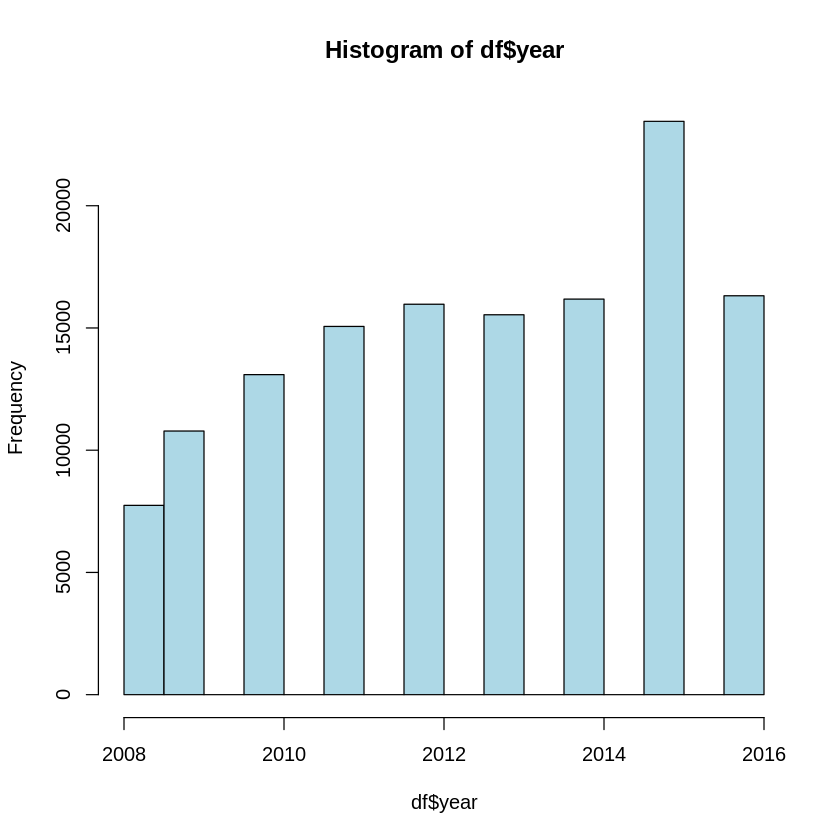

In [10]:
hist(df$year, col='light blue')

In [ ]:
# больше всего в 2015 году. теперь посмотрим месяц

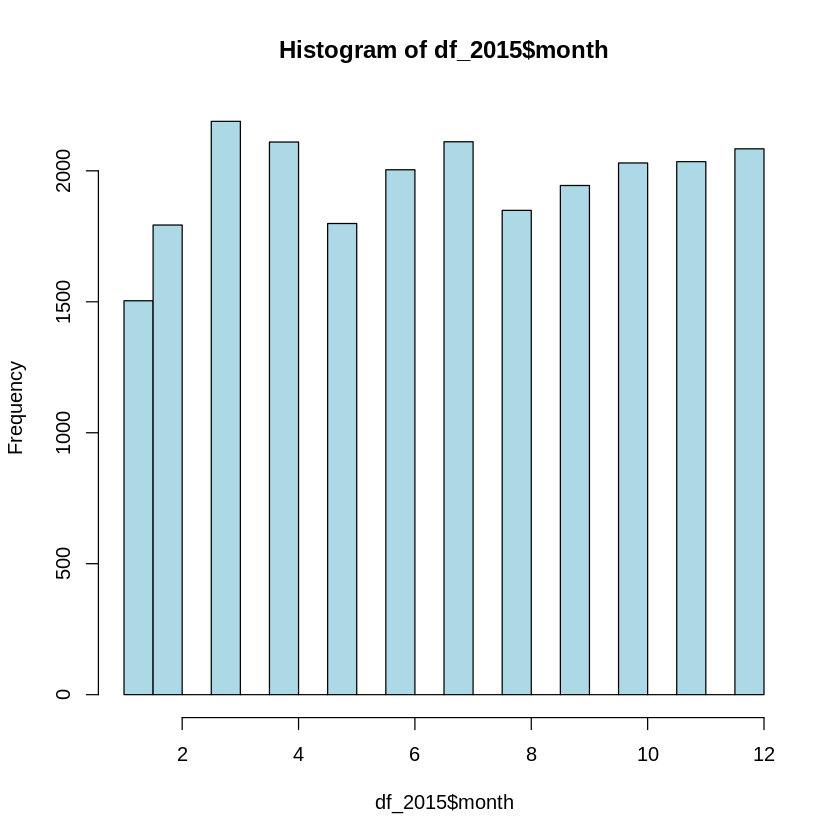

In [16]:
hist(df_2015$month, col='light blue')

In [ ]:
# ответ: март 2015

In [ ]:
# Задание 2 - Проанализируйте публикации в месяце из предыдущего вопроса

In [63]:
df_2015 <- subset(df, df$year == 2015, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))
df_2015_03 <- subset(df_2015, df_2015$month == 3, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))

In [64]:
head(df_2015_03)

,month,title,day,hour,domain,weekday
97667,3,Введение в разработку слайд-шоу на JavaScript,1,0,habrahabr.ru,Воскресенье
97668,3,Дайджест KolibriOS #7: как мы зиму перезимовали,1,0,habrahabr.ru,Воскресенье
97669,3,"9 марта компания Apple сделает то, что не делала в течение последних 5 лет",1,7,habrahabr.ru,Воскресенье
97670,3,Context Model Pattern via Aero Framework,1,7,habrahabr.ru,Воскресенье
97671,3,Заполнение текстовых шаблонов данными на основе модели. Реализация на .NET с использованием динамических функций в байт-коде (IL),1,10,habrahabr.ru,Воскресенье
97672,3,Философия программирования 5 — Колибри и Реактос,1,12,habrahabr.ru,Воскресенье


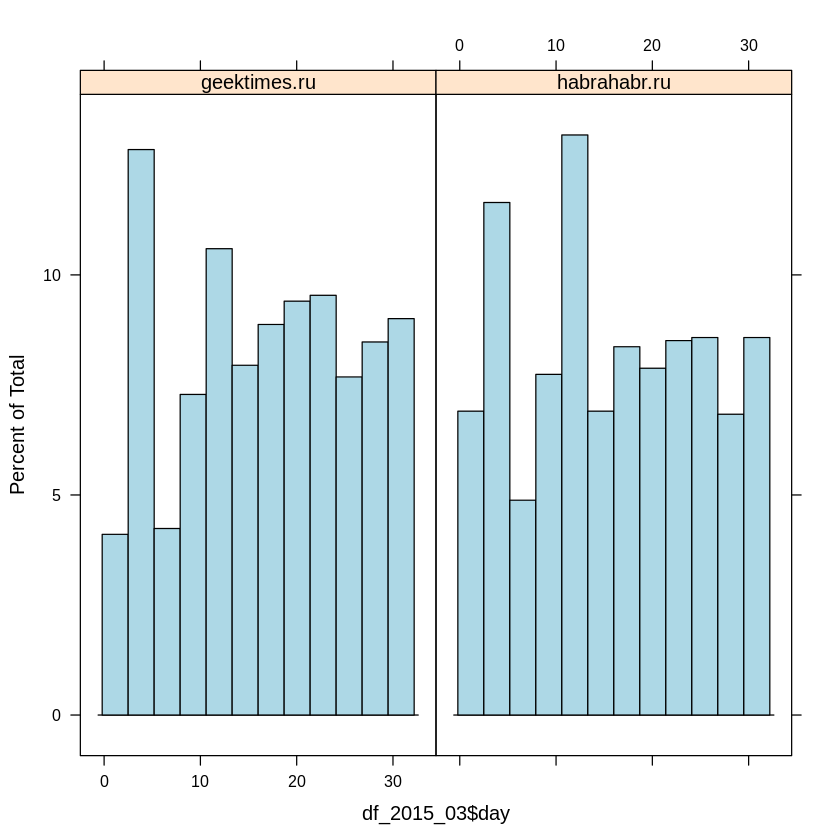

In [68]:
library(lattice)
histogram( ~ df_2015_03$day | df_2015_03$domain, col='light blue')

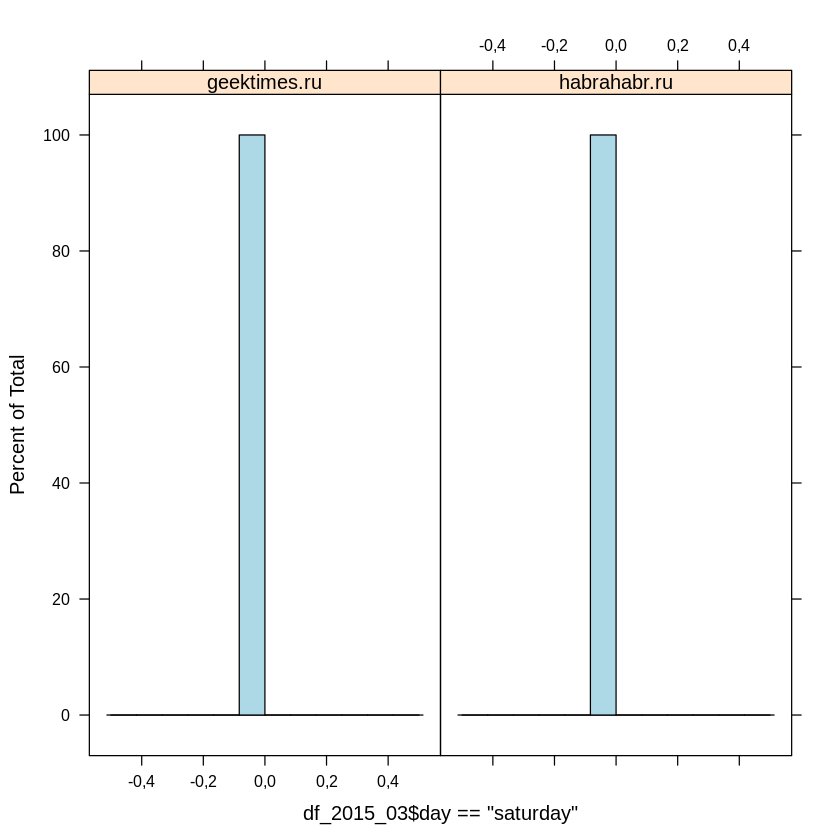

In [72]:
library(lattice)
histogram( ~ df_2015_03$day == "saturday" | df_2015_03$domain, col='light blue')

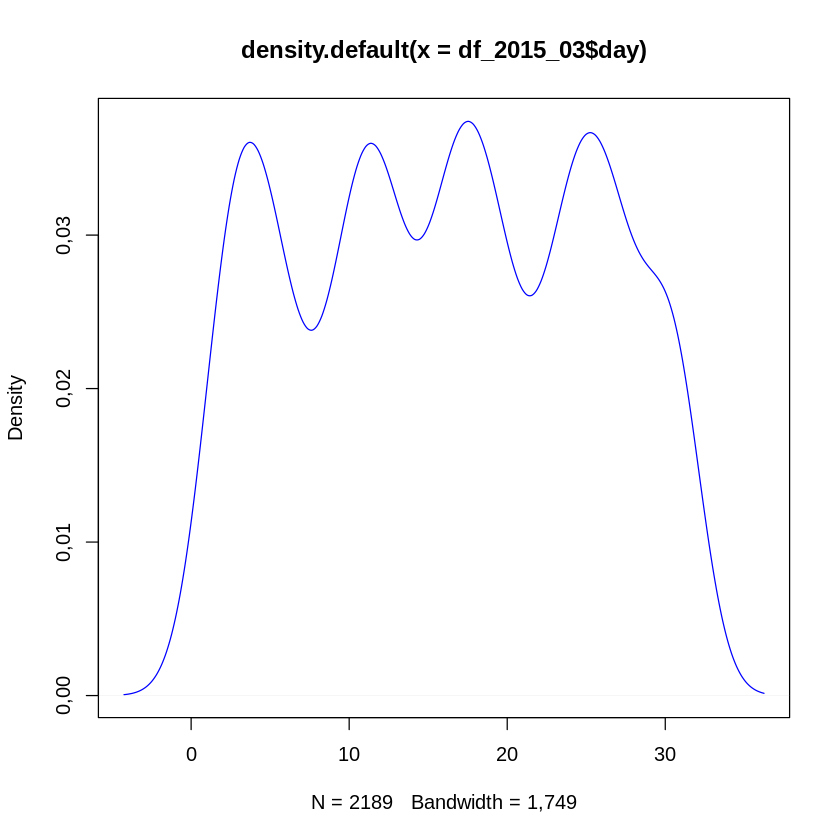

In [71]:
dnst <- density(df_2015_03$day)
plot(dnst, col='blue')

In [ ]:
# Задание 3 - Когда лучше всего публиковать статью?

In [20]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [21]:
library(dplyr)
count_views <- (df %>% group_by(hour) %>%
 summarise(mean = mean(views)))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [22]:
max(count_views)

[1] 22024,66

In [23]:
count_views[count_views['mean'] == max(count_views), 'hour']

hour
5


In [25]:
library(dplyr)
count_comments <- (df %>% group_by(hour) %>%
 summarise(mean = mean(comments)))
max(count_comments)

[1] 53,93569

In [26]:
count_comments[count_comments['mean'] == max(count_comments), 'hour']


hour
4


In [27]:
geektimes <- subset(df, df$domain == 'geektimes.ru', select = c('comments', 'hour', 'domain'))

In [29]:
library(dplyr)
most_comments <- (geektimes %>% group_by(hour) %>%
summarise(max = max(comments)))

In [31]:
most_comments[most_comments['max'] == max(most_comments), 'hour']

hour
3


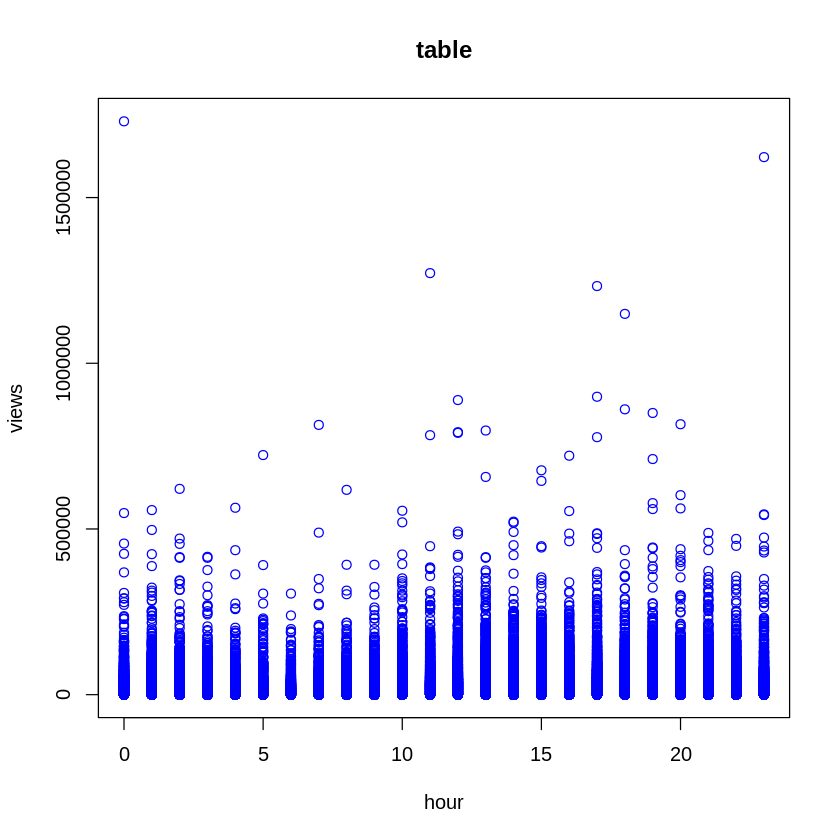

In [33]:
plot(df$hour, 
     df$views,
     col="blue", 
     xlab="hour", 
     ylab = "views", 
     main = "table")

In [ ]:
# Задание 4 - Кого из топ-20 авторов чаще всего минусуют?

In [55]:
mordatyj <- subset(df, df$author == '@Mordatyj', select = c('comments', 'hour', 'domain', 'votes_minus'))
mordatyj[is.na(mordatyj)] <- 0
round(mean(mordatyj$votes_minus)) 

[1] 7

In [56]:
mithgol <- subset(df, df$author == '@Mithgol', select = c('comments', 'hour', 'domain', 'votes_minus'))
mithgol[is.na(mithgol)] <- 0
round(mean(mithgol$votes_minus))

[1] 20

In [57]:
alizar <- subset(df, df$author == '@alizar', select = c('comments', 'hour', 'domain', 'votes_minus'))
alizar[is.na(alizar)] <- 0
round(mean(alizar$votes_minus))

[1] 8

In [58]:
ilya42 <- subset(df, df$author == '@ilya42', select = c('comments', 'hour', 'domain', 'votes_minus'))
ilya42[is.na(ilya42)] <- 0

round(mean(ilya42$votes_minus))

[1] 6

In [ ]:
# видим, что чаще всего минусуют @Mithgol

In [ ]:
# Задание 5 - Сравните субботы и понедельники

In [35]:
install.packages("lattice")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


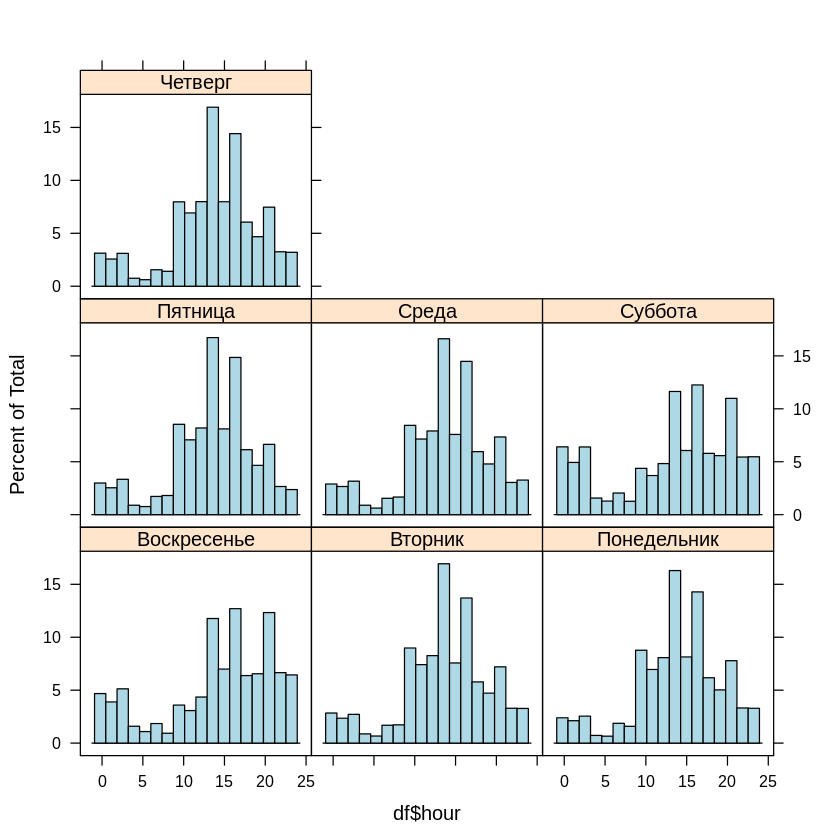

In [37]:
library(lattice)
histogram( ~ df$hour | df$weekday, col='light blue')